In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries:

In [4]:
# basic tools:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# supervised learning tools and models:

# sklearn tools:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score
# sklearn models:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,  AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_extraction.text import CountVectorizer


Load in data:

In [6]:
features = pd.read_csv('/content/drive/MyDrive/DSI/geocaching/data/features.csv')
features

,feature,feature type
0,code,identifiers
1,name,identifiers
2,good_logs_num,numerical
3,neutral_logs_num,numerical
4,bad_logs_num,numerical
5,good_logs_txt,text
6,neutral_logs_txt,text
7,bad_logs_txt,text
8,creator,categorical
9,cache_type,categorical


In [7]:
df = pd.read_csv('/content/drive/MyDrive/DSI/geocaching/data/cleaned_data.csv')
txt_col_list = list(features[features['feature type']=='text']['feature'])
for col in txt_col_list:
    df[col] = df[col].fillna('')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12433 entries, 0 to 12432
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               12433 non-null  object 
 1   name               12433 non-null  object 
 2   good_logs_num      12433 non-null  int64  
 3   neutral_logs_num   12433 non-null  int64  
 4   bad_logs_num       12433 non-null  int64  
 5   good_logs_txt      12433 non-null  object 
 6   neutral_logs_txt   12433 non-null  object 
 7   bad_logs_txt       12433 non-null  object 
 8   creator            12433 non-null  object 
 9   cache_type         12433 non-null  object 
 10  difficulty         12433 non-null  float64
 11  terrain            12433 non-null  float64
 12  latitude           12433 non-null  float64
 13  longitude          12433 non-null  float64
 14  placed             12433 non-null  object 
 15  status             12433 non-null  int64  
 16  is_premium         124

### Prepare X and y:

For this notebook, I will try supervised classification models to predict fav_points (as binary), using:

Cache text only



In [8]:
# y:
df['fav_points_binary'] = [1 if f>1 else 0 for f in list(df['fav_points'])]

y = df['fav_points_binary']
y.value_counts(normalize=True)


0    0.518781
1    0.481219
Name: fav_points_binary, dtype: float64

In [9]:
X3 = pd.read_csv('/content/drive/MyDrive/DSI/geocaching/data/X3.csv')
X3.head()

,cache_text
0,Nickajack Two for OneThis doesn't qualify as o...
1,Shellmound Cache This cache is a easy P&amp;G ...
2,ForestTreasure Take a stroll on the boardwalk ...
3,GA-AL-TN Tri-State RockDuring the summer of 20...
4,LCMT: Out On a Limb While on Little Cedar Mtn....


## Time to try some models!!

Try models on vectorized cache text:

In [10]:
cv0 = CountVectorizer(stop_words='english')
stops = list(cv0.get_stop_words())
stops += ['cache', 'caches', 'caching', 'geocache', 'geocaching', 'muggle']


In [11]:
stops[:20]

['i',
 'still',
 'enough',
 'hereupon',
 'both',
 'that',
 'call',
 'less',
 'who',
 'alone',
 'anyhow',
 'although',
 'could',
 'become',
 'off',
 'all',
 'namely',
 'much',
 'below',
 'against']

In [12]:
# test train split -- my data is pretty close to a 50/50 balance, but I will stratify just to be safe:
X_train, X_test, y_train, y_test = train_test_split(X3,y,random_state = 42, stratify=y)

X3.shape, X_train.shape


((12433, 1), (9324, 1))

In [13]:
X_train.head()

,cache_text
306,In The Dog House Come experience Fort Oglethor...
4142,Diphthong is a funny word. \r\nThe Funny Word ...
5065,We Make it dRain Athens-Clarke County Stormwat...
5788,West Meets East Cache ChallengeThe cache is at...
6156,CamoOfficial Geocaching Bison Tube!Camouflage ...


In [16]:
cv = CountVectorizer(stop_words=stops)
cv.fit(X_train['cache_text'])
Z_train = cv.transform(X_train['cache_text'])
Z_test = cv.transform(X_test['cache_text'])

words = pd.DataFrame(Z_train.todense(),columns= cv.get_feature_names())
words.head()

,00,000,00000,00000000100000000,00011101,0003,000gallons,000th,001,00100000,00100001,00100011,00100100,00100101,00101000,00101001,00101010,00101110,00110000,00110001,00110010,00110011,00110011it,00110100,00110101,00110111,00111000,00111001,00111111,002,0025,003,0030,004,005,006,007,008,0081,008oak,...,zspbycp,zsyw,ztqlso,zucchini,zuckerberg,zud,zugspitze,zvenom96,zvfvh,zw83,zwe,zwerner,zwickau,zx,zxy,zxzeb,zyx,zz,zzbob,zzkr,zzxzlbibwb2ludcbuaw5ligzpdmugdhdv,zzz,zzzdon,ádi,ég,íyotake,île,în,ðà,ôn,úti,überarbeitete,übergrippen,það,þessa,þessum,þingvallavatn,þingvellir,þórisvatn,þú
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
lr = LogisticRegression(max_iter=1000)
lr.fit(Z_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

,model,features used,accuracy,recall,precision,f1-score
0,Log Regression,Cache Text Only,0.696044,0.640374,0.701832,0.669696


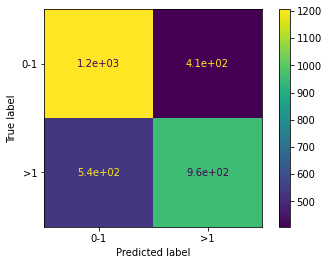

In [20]:
scores = []

preds_lr = lr.predict(Z_test)

cm = confusion_matrix(y_test,preds_lr)
acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
rec = cm[1][1]/(cm[1][1] + cm[1][0])
prc = cm[1][1]/(cm[1][1] + cm[0][1])
f1  = 2*prc*rec/(prc+rec)

# precision and recall are undefined)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0-1', '>1']).plot()

scores.append({
    'model'        : 'Log Regression',
    'features used': 'Cache Text Only',
    'accuracy'     : acc,
    'recall'       : rec,
    'precision'    : prc,
    'f1-score'     : f1
})

pd.DataFrame(scores)

In [21]:
models = [KNeighborsClassifier(),
          DecisionTreeClassifier(), 
          RandomForestClassifier(), 
          BaggingClassifier(),  
          AdaBoostClassifier(),
          SVC()]
modellabel = ['KNeighborsClassifier', 
              'DecisionTreeClassifier', 
              'RandomForestClassifier', 
              'BaggingClassifier',  
              'AdaBoostClassifier',
              'SVC']

for n,model in enumerate(models):

    model.fit(Z_train,y_train)
    pred = model.predict(Z_test)
    cm = confusion_matrix(y_test,pred)
    acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
    rec = cm[1][1]/(cm[1][1] + cm[1][0])
    prc = cm[1][1]/(cm[1][1] + cm[0][1])
    f1  = 2*prc*rec/(prc+rec)
    scores.append({
        'model'        : modellabel[n],
        'features used': 'Cache Text Only',
        'accuracy'     : acc,
        'recall'       : rec,
        'precision'    : prc,
        'f1-score'     : f1
    })
    print(modellabel[n])

pd.DataFrame(scores)

KNeighborsClassifier
DecisionTreeClassifier
RandomForestClassifier
BaggingClassifier
AdaBoostClassifier
SVC


,model,features used,accuracy,recall,precision,f1-score
0,Log Regression,Cache Text Only,0.696044,0.640374,0.701832,0.669696
1,KNeighborsClassifier,Cache Text Only,0.629141,0.394385,0.704898,0.505787
2,DecisionTreeClassifier,Cache Text Only,0.658411,0.616979,0.653683,0.634801
3,RandomForestClassifier,Cache Text Only,0.723705,0.643717,0.747091,0.691562
4,BaggingClassifier,Cache Text Only,0.689611,0.608957,0.705655,0.653750
5,AdaBoostClassifier,Cache Text Only,0.682535,0.541444,0.729073,0.621404
6,SVC,Cache Text Only,0.703120,0.513369,0.797508,0.624644


In [22]:
text_scores = pd.DataFrame(scores)
text_scores.to_csv('/content/drive/MyDrive/DSI/geocaching/data/text_scores.csv',index=False)

In [23]:
# What are the most important words?

In [25]:
terms = cv.get_feature_names() # The actual words.
coefs = lr.coef_[0] # The model coefficients for each word.
bagOwords = pd.DataFrame(terms)
bagOwords['word'] = bagOwords[0]
bagOwords.drop(columns=0,inplace=True)
bagOwords['coef'] = coefs
bagOwords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43596 entries, 0 to 43595
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   word    43596 non-null  object 
 1   coef    43596 non-null  float64
dtypes: float64(1), object(1)
memory usage: 681.3+ KB


In [26]:
bagOwords.sort_values(by='coef').head(20) # words that predict favpoints <2

,word,coef
39920,triple,-1.212213
3418,academy,-1.206983
24634,lonely,-1.167490
11389,crooked,-1.113452
19632,handicap,-1.101462
28388,online,-1.099311
19656,handy,-1.065622
26286,minutes,-1.047466
24298,limits,-1.033423
41775,wally,-1.010853


In [28]:
bagOwords.sort_values(by='coef').tail(20) # words that predict favpoints>=2

,word,coef
19541,haha,0.992340
23539,la,0.998257
40402,unactivated,1.003489
16021,finally,1.018258
1457,2byop,1.018576
6876,bobemkat,1.037347
1119,2019,1.038453
40771,unusual,1.041543
6991,boo2931,1.041809
30303,plantstrong,1.046672


In [29]:
bagOwords.to_csv('/content/drive/MyDrive/DSI/geocaching/data/bagOwords.csv',index=False)